<h2 style="color: red;"><p><u>To visualize clusters in single cell expression data</u></p></h2>

In [1]:
import numpy as np
from numpy_simulator import Sim
import time
from src.techinical_noise import AddTechnicalNoise
from sklearn.decomposition import PCA     
from sklearn.manifold import TSNE    
import matplotlib.pyplot as plt
import scanpy as sc
import sc3s
from umap import UMAP

In [2]:
import json
 
# Opening JSON file
with open("./data/data_sets_sergio.json") as json_file:
    data_sets = json.load(json_file)
data_sets    

{'DS1': {'interactions': 'SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Interaction_cID_4.txt',
  'regulators': 'SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Regs_cID_4.txt',
  'params_outliers_genes_noise': [0.01, 0.8, 1],
  'params_library_size_noise': [4.8, 0.3],
  'params_dropout_noise': [20, 82],
  'tot_genes': 100,
  'tot_cell_types': 9},
 'DS2': {'interactions': 'SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Interaction_cID_5.txt',
  'regulators': 'SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Regs_cID_5.txt',
  'params_outliers_genes_noise': [0.01, 0.8, 1],
  'params_library_size_noise': [6, 0.4],
  'params_dropout_noise': [12, 80],
  'tot_genes': 400,
  'tot_cell_types': 9},
 'DS3': {'interactions': 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt',
  'regulators': 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt',
  'params_outliers_genes_noise': [0.01, 0.8, 1],
  'params_library_size_noise': [7, 0.4],
  'params_drop

In [3]:
NUM_SIM_CELLS = 10000

def plot_labelled_dimentionality_reduction(xy, num_cell_types, num_sim_cells, ax=None):
    anno = np.concatenate([np.array([str(x)] * num_sim_cells, dtype=object) for x in range(num_cell_types)], axis=0)
    if ax is None:
        fig = plt.figure(figsize = (10, 7))
        ax = fig.add_subplot()
    colormap = plt.get_cmap("Paired")
    for i, clust in enumerate(np.sort(np.unique(anno))):
        idx = np.where(anno == clust)[0]
        ax.scatter(xy[idx, 0], xy[idx, 1], color = colormap(i), label = clust)
    ax.legend()
    
    
def extract_dataset_info(dataset):
    interactions_filename, regulators_filename = dataset['interactions'], dataset['regulators']
    outlier_genes_noises = tuple(dataset['params_outliers_genes_noise'])
    library_size_noises = tuple(dataset['params_library_size_noise'])
    dropout_noises = tuple(dataset['params_dropout_noise'])
    num_genes, num_cell_types = int(dataset['tot_genes']), int(dataset['tot_cell_types'])
    return interactions_filename, regulators_filename, num_genes, num_cell_types, outlier_genes_noises, library_size_noises, dropout_noises


def debug_datasets(dataset: list, pca=True, pca_components=2, umap=True):
    """ give the json dataset information and it will show pca plot """
    
    interactions_filename, regulators_filename, num_genes, num_cell_types, outlier_genes_noises, library_size_noises, dropout_noises = extract_dataset_info(dataset)
    
    start = time.time()
    sim = Sim(num_genes=num_genes, num_cells_types=num_cell_types, num_cells_to_simulate=1000, interactions=interactions_filename, regulators=regulators_filename, noise_amplitude=0.7)
    sim.run()
    expr_clean = sim.x
    print(expr_clean.shape)
    print(f"took {time.time() - start} seconds")

    expr = AddTechnicalNoise(num_genes, num_cell_types, expr_clean.shape[0], outlier_genes_noises, library_size_noises, dropout_noises).get_noisy_technical_concentration(expr_clean.T)
    print(f"shape noisy data: {expr.shape}")
    expr = expr.T
    
    if pca or umap:
        counts = expr/(np.sum(expr, axis = 1)[:, None] + 1e-6)* 100
        counts = np.log1p(expr)
    
    x_pca = None
    if pca:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18, 7))
        x_pca = pca = PCA(n_components = pca_components).fit_transform(counts)
        plot_labelled_dimentionality_reduction(x_pca, num_cell_types, NUM_SIM_CELLS, ax[0])
    
    if umap:
        if x_pca is None:
            xy_umap = UMAP(n_components = 2).fit_transform(counts)
            plot_labelled_dimentionality_reduction(xy_umap, num_cell_types, NUM_SIM_CELLS)
        else:
            xy_umap = UMAP(n_components = 2).fit_transform(x_pca)
            plot_labelled_dimentionality_reduction(xy_umap, num_cell_types, NUM_SIM_CELLS, ax[1])
        
    plt.show()
    return expr    

**********************DATASET: <<DS1>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Interaction_cID_4.txt', 'regulators': 'SERGIO/data_sets/De-noised_100G_9T_300cPerT_4_DS1/Regs_cID_4.txt', 'params_outliers_genes_noise': [0.01, 0.8, 1], 'params_library_size_noise': [4.8, 0.3], 'params_dropout_noise': [20, 82], 'tot_genes': 100, 'tot_cell_types': 9}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
(10000, 100, 9)
took 2.8350205421447754 seconds
shape noisy data: (100, 90000)


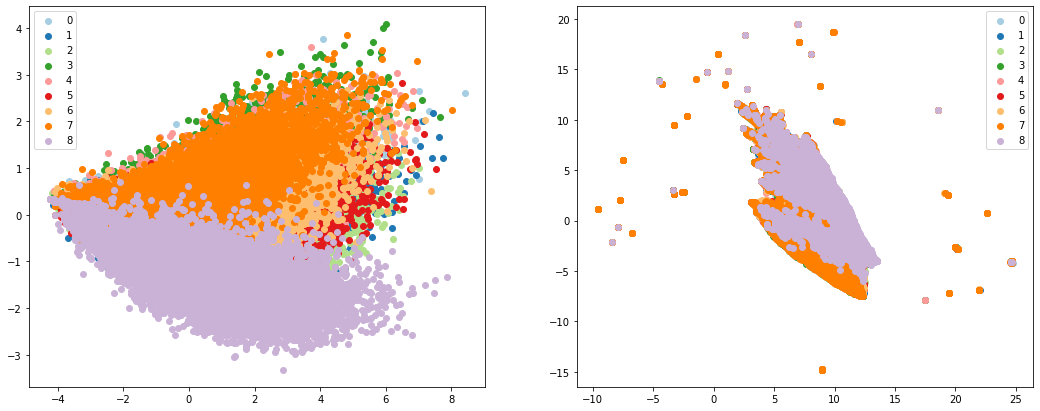

**********************DATASET: <<DS2>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Interaction_cID_5.txt', 'regulators': 'SERGIO/data_sets/De-noised_400G_9T_300cPerT_5_DS2/Regs_cID_5.txt', 'params_outliers_genes_noise': [0.01, 0.8, 1], 'params_library_size_noise': [6, 0.4], 'params_dropout_noise': [12, 80], 'tot_genes': 400, 'tot_cell_types': 9}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
layer:  3
layer:  4
layer:  5
(10000, 400, 9)
took 8.628403186798096 seconds
shape noisy data: (400, 90000)


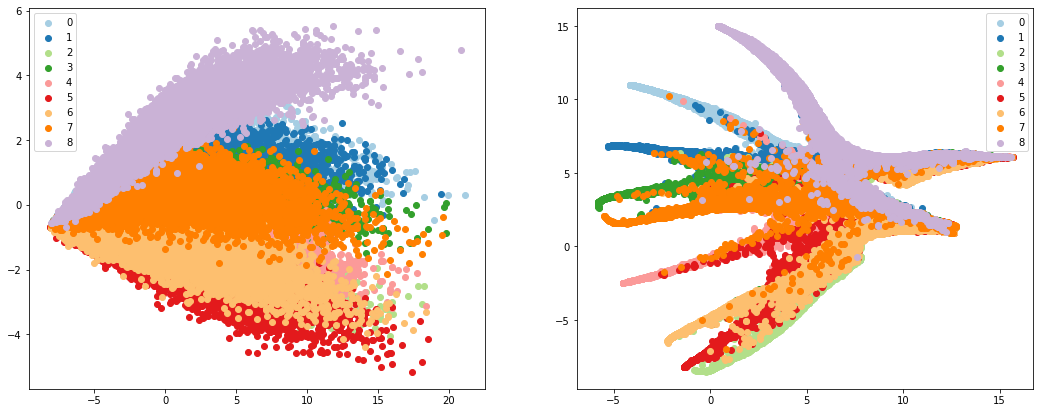

**********************DATASET: <<DS3>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Interaction_cID_6.txt', 'regulators': 'SERGIO/data_sets/De-noised_1200G_9T_300cPerT_6_DS3/Regs_cID_6.txt', 'params_outliers_genes_noise': [0.01, 0.8, 1], 'params_library_size_noise': [7, 0.4], 'params_dropout_noise': [12, 80], 'tot_genes': 12000, 'tot_cell_types': 9}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
layer:  3
layer:  4
layer:  5
layer:  6
(10000, 12000, 9)
took 19.85974431037903 seconds
shape noisy data: (12000, 90000)


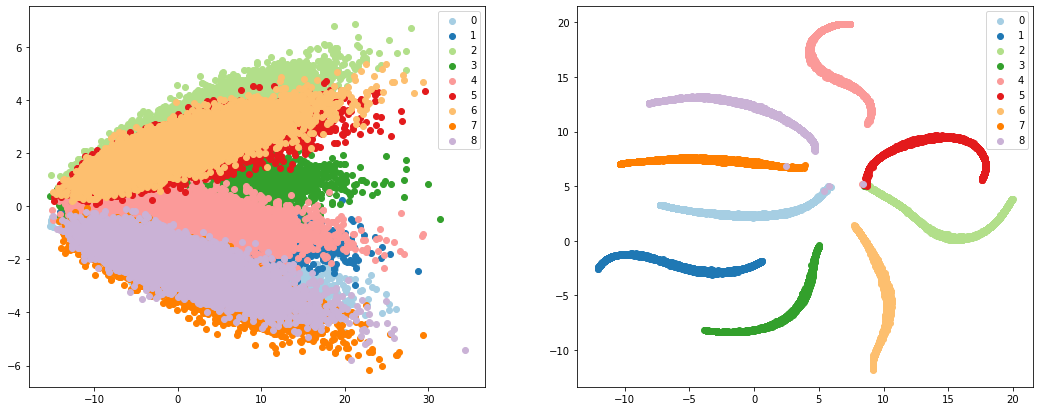

**********************DATASET: <<DS4>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_100G_3T_300cPerT_dynamics_9_DS4/Interaction_cID_9.txt', 'regulators': 'SERGIO/data_sets/De-noised_100G_3T_300cPerT_dynamics_9_DS4/Regs_cID_9.txt', 'params_outliers_genes_noise': [0.01, 3, 1], 'params_library_size_noise': [6, 0.3], 'params_dropout_noise': [8, 74], 'tot_genes': 100, 'tot_cell_types': 3}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
(10000, 100, 3)
took 2.5699214935302734 seconds
shape noisy data: (100, 30000)


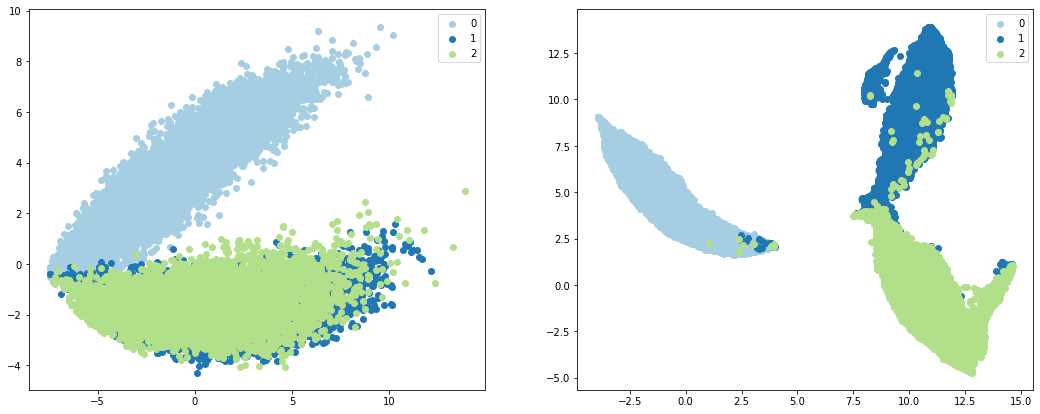

**********************DATASET: <<DS5>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_100G_4T_300cPerT_dynamics_10_DS5/Interaction_cID_10.txt', 'regulators': 'SERGIO/data_sets/De-noised_100G_4T_300cPerT_dynamics_10_DS5/Regs_cID_10.txt', 'params_outliers_genes_noise': [0.01, 3, 1], 'params_library_size_noise': [6, 0.4], 'params_dropout_noise': [8, 82], 'tot_genes': 100, 'tot_cell_types': 4}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
(10000, 100, 4)
took 2.6598970890045166 seconds
shape noisy data: (100, 40000)


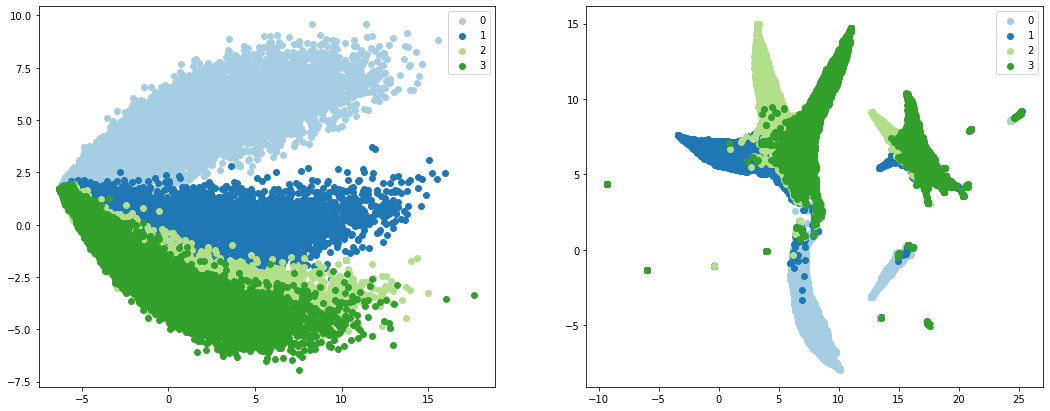

**********************DATASET: <<DS6>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_100G_6T_300cPerT_dynamics_7_DS6/Interaction_cID_7.txt', 'regulators': 'SERGIO/data_sets/De-noised_100G_6T_300cPerT_dynamics_7_DS6/Regs_cID_7.txt', 'params_outliers_genes_noise': [0.01, 5, 1], 'params_library_size_noise': [4.5, 0.7], 'params_dropout_noise': [8, 45], 'tot_genes': 100, 'tot_cell_types': 6}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
(10000, 100, 6)
took 2.7591958045959473 seconds
shape noisy data: (100, 60000)


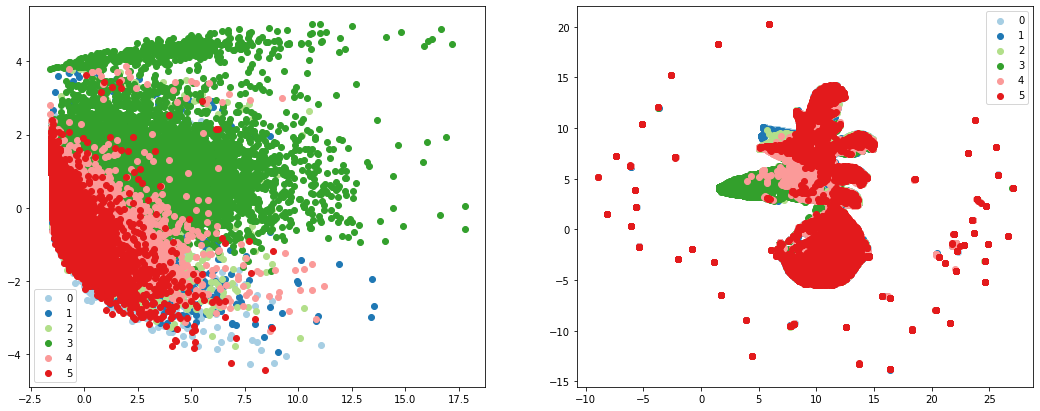

**********************DATASET: <<DS7>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_100G_7T_300cPerT_dynamics_11_DS7/Interaction_cID_11.txt', 'regulators': 'SERGIO/data_sets/De-noised_100G_7T_300cPerT_dynamics_11_DS7/Regs_cID_11.txt', 'params_outliers_genes_noise': [0.01, 3, 1], 'params_library_size_noise': [4.4, 0.8], 'params_dropout_noise': [8, 85], 'tot_genes': 100, 'tot_cell_types': 7}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
(10000, 100, 7)
took 2.7997922897338867 seconds
shape noisy data: (100, 70000)


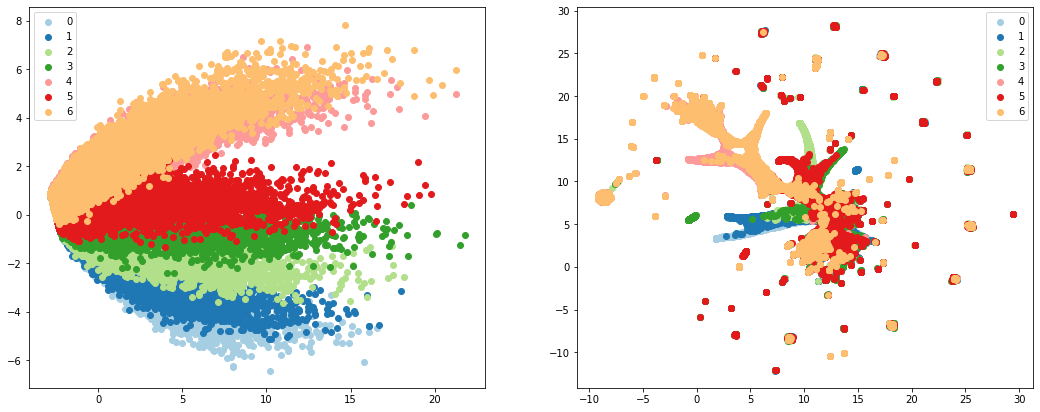

**********************DATASET: <<DS8>>*******************************
{'interactions': 'SERGIO/data_sets/De-noised_100G_3T_300cPerT_dynamics_8_DS8/Interaction_cID_8.txt', 'regulators': 'SERGIO/data_sets/De-noised_100G_3T_300cPerT_dynamics_8_DS8/Regs_cID_8.txt', 'params_outliers_genes_noise': [0.01, 4.5, 1], 'params_library_size_noise': [10, 0.55], 'params_dropout_noise': [2, 92], 'tot_genes': 100, 'tot_cell_types': 3}
sampling time steps:  10000
layer:  0
layer:  1
layer:  2
(10000, 100, 3)
took 2.613567590713501 seconds
shape noisy data: (100, 30000)


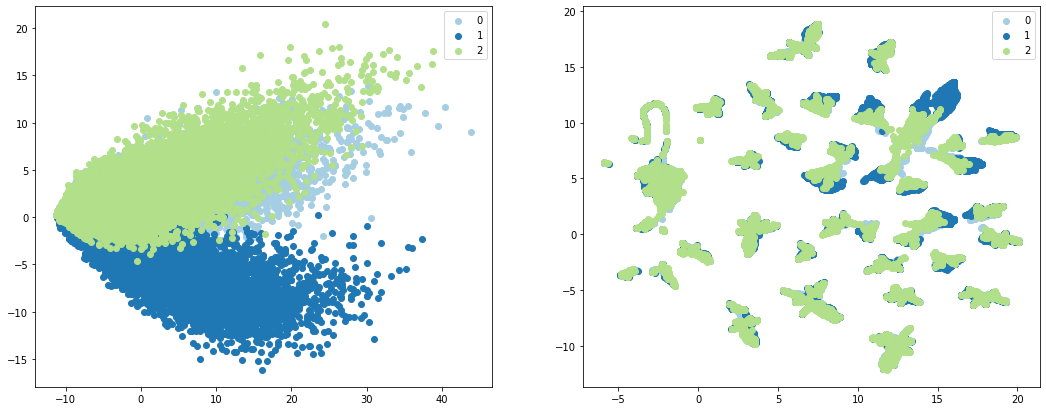

In [4]:
counts_data_sets = {}
for key, val in data_sets.items():
    print(f"**********************DATASET: <<{key}>>*******************************")
    print(val)
    expr = debug_datasets(val, pca_components=10)
    counts_data_sets[key] = expr